# <center> Working with MNIST and PyTorch for Alphabet recognition </center>


In [4]:
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [5]:
mnist = datasets.MNIST('./data', download = True)

In [6]:
nine = mnist.data[(mnist.targets == 9)]/255.0
four = mnist.data[(mnist.targets == 4)]/255.0
len(four), len(nine)

(5842, 5949)

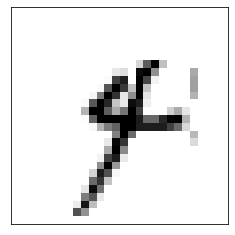

In [33]:
plt.imshow(four[4], cmap = 'gray_r')
plt.xticks([])
plt.yticks([])
plt.show()

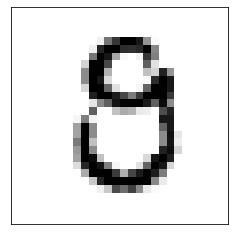

In [32]:
plt.imshow(nine[9], cmap = 'gray_r')
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
nine.shape, four.shape

(torch.Size([5949, 28, 28]), torch.Size([5842, 28, 28]))

In [10]:
comb = torch.cat([four, nine])
comb.shape

torch.Size([11791, 28, 28])

In [11]:
flat = comb.view((-1, 28*28))
flat.shape

torch.Size([11791, 784])

In [12]:
target = torch.tensor([1] * len(four) + [2] * len(nine))
target.shape

torch.Size([11791])

In [13]:
def sigmoid(x) : return 1/(1 + torch.exp(-x))
def simple_nn(data, weights, bias): return sigmoid((data@weights) + bias)

In [14]:
w = torch.randn((flat.shape[1], 1), requires_grad = True)
b = torch.randn((1, 1), requires_grad = True)

In [15]:
def error(pred, target): return ((pred - target) ** 2).mean()

In [16]:
for i in range(50) : 
  pred = simple_nn(flat, w, b)
  loss = error(pred, target.unsqueeze(1))
  loss.backward()

  w.data -= 0.001 * w.grad.data
  b.data -= 0.001 * b.grad.data
  print("Loss : ", loss.item())

  w.grad.zero_()
  b.grad.zero_()

Loss :  1.1861211061477661
Loss :  1.185560703277588
Loss :  1.185001015663147
Loss :  1.184441328048706
Loss :  1.183882236480713
Loss :  1.1833231449127197
Loss :  1.1827645301818848
Loss :  1.182206392288208
Loss :  1.1816486120224
Loss :  1.1810904741287231
Loss :  1.1805332899093628
Loss :  1.1799763441085815
Loss :  1.1794195175170898
Loss :  1.1788629293441772
Loss :  1.178307056427002
Loss :  1.177751064300537
Loss :  1.1771955490112305
Loss :  1.176640272140503
Loss :  1.1760855913162231
Loss :  1.1755309104919434
Loss :  1.1749765872955322
Loss :  1.1744225025177002
Loss :  1.1738688945770264
Loss :  1.173315405845642
Loss :  1.1727625131607056
Loss :  1.1722095012664795
Loss :  1.1716573238372803
Loss :  1.1711053848266602
Loss :  1.1705536842346191
Loss :  1.1700021028518677
Loss :  1.1694509983062744
Loss :  1.1689000129699707
Loss :  1.1683497428894043
Loss :  1.1677995920181274
Loss :  1.1672497987747192
Loss :  1.1667001247406006
Loss :  1.1661508083343506
Loss :  1.165

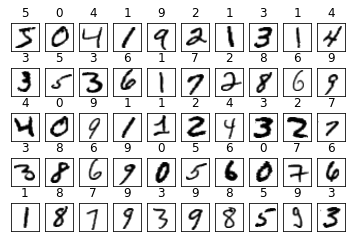

In [31]:
def sample_mnist(row, col) : 
  for i in range(row * col) : 
    plt.subplot(row, col, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.title(mnist[i][1])
    plt.imshow(np.array(mnist[i][0]), cmap = 'gray_r')
  plt.show()

sample_mnist(5, 10)

In [18]:
def rep_pixels(idx) :
  df = pd.DataFrame(np.array(mnist[idx][0]))
  print("Pixel representation for the digit : {}\n".format(mnist[idx][1]))
  return df.style.set_properties(**{'font-size': '10pt'}).background_gradient('Greys')

rep_pixels(100)

Pixel representation for the digit : 5



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,2,18,46,136,136,244,255,241,103,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,15,94,163,253,253,253,253,238,218,204,35,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,131,253,253,253,253,237,200,57,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,155,246,253,247,108,65,45,0,0,0,0,0,0,0,0,0,0,0


In [19]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

In [20]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
valloader = torch.utils.data.DataLoader(valset, batch_size = 64, shuffle = True)

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...
Done!


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw





Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [21]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


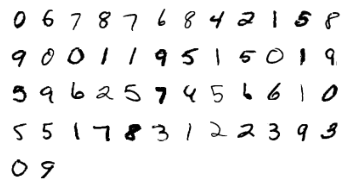

In [22]:
figure = plt.figure()
num_img = 50
for index in range(1, num_img + 1) :
  plt.subplot(6, 12, index)
  plt.axis('off')
  plt.imshow(images[index].numpy().squeeze(), cmap = 'gray_r')

In [23]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(), nn.Linear(hidden_sizes[0], hidden_sizes[1]), nn.ReLU(), nn.Linear(hidden_sizes[1], output_size), nn.LogSoftmax(dim = 1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [24]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels)

In [25]:
print ('Before backward pass : \n', model[0].weight.grad)
loss.backward()
print ('After backward pass : \n', model[0].weight.grad)

Before backward pass : 
 None
After backward pass : 
 tensor([[ 0.0040,  0.0040,  0.0040,  ...,  0.0040,  0.0040,  0.0040],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        ...,
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0008,  0.0008,  0.0008,  ...,  0.0008,  0.0008,  0.0008],
        [ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016]])


In [26]:
optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum = 0.9)
time0 = time()
epochs = 15
for e in range(epochs) :
    running_loss = 0
    for images, labels in trainloader :
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else :
        print("Epoch {} - Training loss : {}".format(e, running_loss / len(trainloader)))
print("\nTraining Time (in minutes) = ",(time() - time0) / 60)

Epoch 0 - Training loss : 0.6146471845363376
Epoch 1 - Training loss : 0.2823376399216685
Epoch 2 - Training loss : 0.21986923211498427
Epoch 3 - Training loss : 0.1768898598746514
Epoch 4 - Training loss : 0.14754880194875922
Epoch 5 - Training loss : 0.12608787099292665
Epoch 6 - Training loss : 0.10988759984478735
Epoch 7 - Training loss : 0.09707311640328753
Epoch 8 - Training loss : 0.08751150036055937
Epoch 9 - Training loss : 0.07894932200758854
Epoch 10 - Training loss : 0.07291669600001817
Epoch 11 - Training loss : 0.06496700818247314
Epoch 12 - Training loss : 0.06065163218047915
Epoch 13 - Training loss : 0.056002147865098426
Epoch 14 - Training loss : 0.05144693508251771

Training Time (in minutes) =  2.6538219531377156


In [29]:
images, labels = next(iter(valloader))
img = images[0].view(1, 784)
with torch.no_grad() : 
  logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit = ", probab.index(max(probab)))

Predicted Digit =  3


In [30]:
correct_count, all_count = 0, 0
for images,labels in valloader :
  for i in range(len(labels)) :
    img = images[i].view(1, 784)
    with torch.no_grad() :
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1
print("Number Of Images Tested = ", all_count)
print("\nModel Accuracy = ", (correct_count / all_count))

Number Of Images Tested =  10000

Model Accuracy =  0.9734
